In [ ]:
import dill
dill.load_session('post_forward_selection.db')

In [3]:
X_train = sfs.transform(X_train)
X_test = sfs.transform(X_test)

# Useful functions

In [14]:
def print_evaluation(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

def print_training_history(history):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, "bo", label="Training loss")
    plt.plot(epochs, val_loss_values, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]
    plt.plot(epochs, acc, "bo", label="Training acc")
    plt.plot(epochs, val_acc, "b", label="Validation acc")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Logistic Regression

In [10]:
lr = LogisticRegression(solver="lbfgs", max_iter=1000, n_jobs=-1)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     10077
           1       0.63      0.47      0.54      3097

    accuracy                           0.81     13174
   macro avg       0.74      0.69      0.71     13174
weighted avg       0.80      0.81      0.80     13174



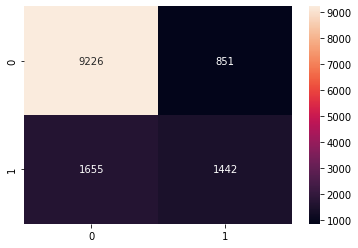

In [13]:
y_pred = lr.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

# 2*100 neural network

In [ ]:
# 2*100 neural network

m200 = Sequential([
    Dense(100, input_dim=X_train.shape[1], activation="relu"),
    Dropout(0.5),
    Dense(100, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

m200.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

history = m200.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=True)

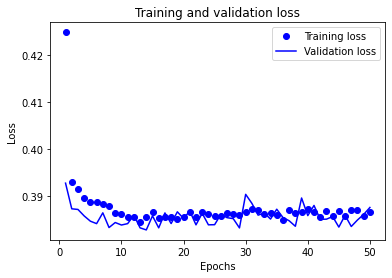

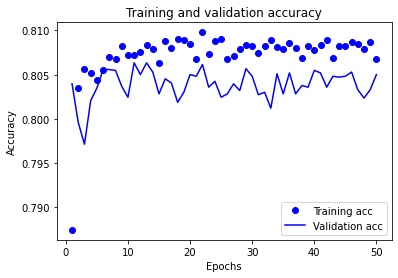

In [8]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

412/412 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     10077
           1       0.66      0.39      0.49      3097

    accuracy                           0.81     13174
   macro avg       0.75      0.67      0.69     13174
weighted avg       0.79      0.81      0.79     13174



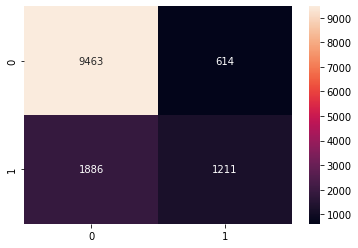

In [9]:
y_pred = np.round(m200.predict(X_test))

# classificaiton report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [15]:
#3*50 neural network

m450 = Sequential([
    Dense(50, input_dim=X_train.shape[1], activation="relu"),
    Dropout(0.5),
    Dense(50, activation="relu"),
    Dropout(0.5),
    Dense(50, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

m450.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
history = m450.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=True)

Epoch 1/50
1318/1318 [==============================] - 11s 7ms/step - loss: 0.4505 - accuracy: 0.7767 - val_loss: 0.3983 - val_accuracy: 0.7907
Epoch 2/50
1318/1318 [==============================] - 10s 8ms/step - loss: 0.4076 - accuracy: 0.7955 - val_loss: 0.3949 - val_accuracy: 0.7920
Epoch 3/50
1318/1318 [==============================] - 10s 8ms/step - loss: 0.4004 - accuracy: 0.8000 - val_loss: 0.3892 - val_accuracy: 0.7967
Epoch 4/50
1318/1318 [==============================] - 10s 8ms/step - loss: 0.3972 - accuracy: 0.8018 - val_loss: 0.3881 - val_accuracy: 0.8016
Epoch 5/50
1318/1318 [==============================] - 9s 7ms/step - loss: 0.3946 - accuracy: 0.8013 - val_loss: 0.3859 - val_accuracy: 0.8053
Epoch 6/50
1318/1318 [==============================] - 10s 7ms/step - loss: 0.3953 - accuracy: 0.8032 - val_loss: 0.3853 - val_accuracy: 0.8054
Epoch 7/50
1318/1318 [==============================] - 10s 8ms/step - loss: 0.3949 - accuracy: 0.8031 - val_loss: 0.3903 - val_acc

412/412 [==============================] - 2s 4ms/step


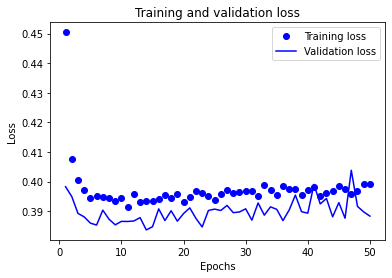

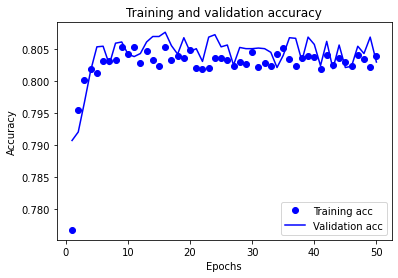

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     10077
           1       0.66      0.40      0.49      3097

    accuracy                           0.81     13174
   macro avg       0.75      0.67      0.69     13174
weighted avg       0.79      0.81      0.79     13174



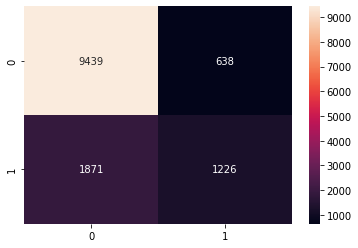

In [16]:
y_pred = np.round(m450.predict(X_test))

print_training_history(history)

print_evaluation(y_test, y_pred)

# 3 * 128 neural network

In [19]:
m3128 = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation="relu"),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

m3128.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
history = m3128.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=True)

Epoch 1/50
1318/1318 [==============================] - 11s 7ms/step - loss: 0.4230 - accuracy: 0.7887 - val_loss: 0.3923 - val_accuracy: 0.7950
Epoch 2/50
1318/1318 [==============================] - 11s 8ms/step - loss: 0.3974 - accuracy: 0.8021 - val_loss: 0.3844 - val_accuracy: 0.7959
Epoch 3/50
1318/1318 [==============================] - 10s 8ms/step - loss: 0.3938 - accuracy: 0.8024 - val_loss: 0.3881 - val_accuracy: 0.8021
Epoch 4/50
1318/1318 [==============================] - 11s 9ms/step - loss: 0.3946 - accuracy: 0.8052 - val_loss: 0.3872 - val_accuracy: 0.8044
Epoch 5/50
1318/1318 [==============================] - 11s 8ms/step - loss: 0.3918 - accuracy: 0.8056 - val_loss: 0.3841 - val_accuracy: 0.8074
Epoch 6/50
1318/1318 [==============================] - 11s 9ms/step - loss: 0.3918 - accuracy: 0.8055 - val_loss: 0.3901 - val_accuracy: 0.7968
Epoch 7/50
1318/1318 [==============================] - 11s 8ms/step - loss: 0.3925 - accuracy: 0.8056 - val_loss: 0.3835 - val_ac

412/412 [==============================] - 1s 2ms/step


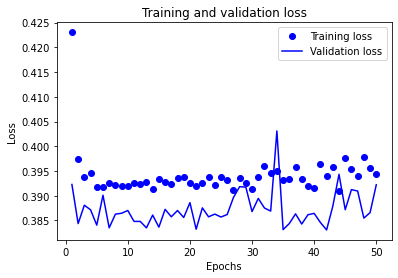

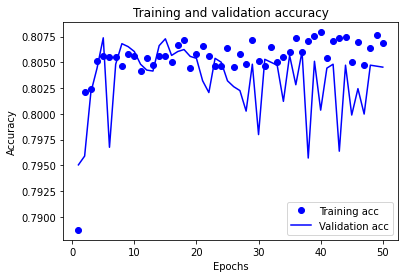

              precision    recall  f1-score   support

           0       0.83      0.95      0.88     10077
           1       0.67      0.35      0.46      3097

    accuracy                           0.81     13174
   macro avg       0.75      0.65      0.67     13174
weighted avg       0.79      0.81      0.78     13174



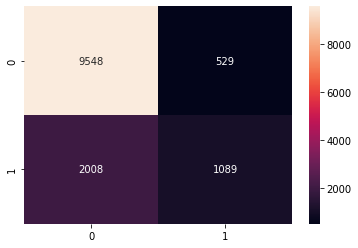

In [20]:
y_pred = np.round(m3128.predict(X_test))

print_training_history(history)
print_evaluation(y_test, y_pred)